# **Project InsightAds**  
### **Digital-Marketing-Performance-Analysis**

**Team Name** : Nova  
**Members** : 'Izzah Huwaidah (Ketua), Ashma Nisa Sholiha   
**Competition** : inSight Data – Data Analyst Competition  
**Date** : January - February 2026


## **Latar Belakang**

Periklanan digital merupakan salah satu strategi utama dalam meningkatkan 
brand awareness dan penjualan. Namun, peningkatan anggaran iklan tidak selalu 
diikuti dengan peningkatan performa yang sebanding. Oleh karena itu, diperlukan 
analisis data yang komprehensif untuk mengevaluasi efektivitas iklan, mengidentifikasi 
pola performa, serta menemukan peluang optimasi berbasis data.


## **Deskripsi Dataset**

Dataset yang digunakan berisi data performa iklan digital yang mencakup metrik 
seperti impressions, clicks, content views, add to cart, purchases, biaya iklan, 
serta nilai pembelian. Data ini digunakan untuk menganalisis efektivitas iklan 
berdasarkan berbagai objective kampanye dan periode waktu tertentu.


## **Impor Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data Ads - Kompetisi Data Analyts by inSight Data Batch 01.csv")

## **Data Cleaning and Preparation** (kalo emang perlu nanti)

In [3]:
df.head()

,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent
0,2023-01-01,Client A - Fashion,Traffic,915434.0,81436.0,92554.0,15544.0,0.0,0.0,0.0,0.0,2357742.0
1,2023-01-01,Client A - Fashion,Sales,103328.0,89200.0,22100.0,38038.0,1199.0,817.0,824.0,3353702.0,3578529.0
2,2023-01-01,Client B - Beauty,Traffic,336015.0,141082.0,26321.0,46107.0,0.0,0.0,0.0,0.0,1482711.0
3,2023-01-01,Client B - Beauty,Sales,864410.0,400596.0,10719.0,29397.0,3395.0,960.0,591.0,3470984.0,4335272.0
4,2023-01-01,Client C - Fashion,Traffic,916254.0,319415.0,32995.0,37496.0,0.0,0.0,0.0,0.0,1897353.0


In [4]:
df.shape

(4380, 12)

In [5]:
# checking for null values
df.isnull().sum()

created_date          0
account_name          0
campaign_objective    0
impressions           0
reach                 0
clicks                0
link_clicks           0
content_views         0
add_to_cart           0
purchase              0
purchase_value        0
amount_spent          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_date        4380 non-null   object 
 1   account_name        4380 non-null   object 
 2   campaign_objective  4380 non-null   object 
 3   impressions         4380 non-null   float64
 4   reach               4380 non-null   float64
 5   clicks              4380 non-null   float64
 6   link_clicks         4380 non-null   float64
 7   content_views       4380 non-null   float64
 8   add_to_cart         4380 non-null   float64
 9   purchase            4380 non-null   float64
 10  purchase_value      4380 non-null   float64
 11  amount_spent        4380 non-null   float64
dtypes: float64(9), object(3)
memory usage: 410.8+ KB


In [7]:
df.columns

Index(['created_date', 'account_name', 'campaign_objective', 'impressions',
       'reach', 'clicks', 'link_clicks', 'content_views', 'add_to_cart',
       'purchase', 'purchase_value', 'amount_spent'],
      dtype='object')

In [8]:
# Ekstrak data tambahan (Regex)
df['industry'] = df['account_name'].str.extract(r'- (\w+)')[0]
df['client'] = df['account_name'].str.extract(r'(Client [A-Z])')[0]

In [9]:
# =========================
# 2) TRIM & NORMALISASI TEKS
# =========================
for col in ["account_name", "campaign_objective"]:
    df[col] = df[col].astype(str).str.strip()

# Normalisasi nilai objective (biar konsisten: Traffic/Sales)
df["campaign_objective"] = (
    df["campaign_objective"]
      .str.lower()
      .replace({
          "traffic ": "traffic",
          " sales": "sales",
          "conversion": "sales",
          "conversions": "sales"
      })
)

# Pakai title-case biar enak di laporan
df["campaign_objective"] = df["campaign_objective"].str.title()


In [10]:
# =========================
# 3) KONVERSI TIPE TANGGAL
# =========================
df["created_date"] = pd.to_datetime(df["created_date"], errors="coerce")

# Jika ada tanggal yang gagal diparse → cek
bad_date = df["created_date"].isna().sum()
print("Tanggal gagal parse:", bad_date)
# Kalau bad_date > 0, nanti kita inspeksi barisnya:
# display(df[df["created_date"].isna()].head())

Tanggal gagal parse: 0


In [11]:
# =========================
# 4) KONVERSI KOLOM ANGKA (SAFE COERCE)
# =========================
num_cols = [
    "impressions","reach","clicks","link_clicks","content_views",
    "add_to_cart","purchase","purchase_value","amount_spent"
]

for c in num_cols:
    # bersihin kalau ada pemisah ribuan koma, dll.
    df[c] = (
        df[c]
          .astype(str)
          .str.replace(",", "", regex=False)
          .str.replace(" ", "", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors="coerce")



In [12]:
# =========================
# 5) HANDLE MISSING VALUES (SIMPLE & MASUK AKAL)
# =========================
# Karena metrik ads umumnya "0 berarti tidak ada event", missing biasanya diperlakukan 0.
df[num_cols] = df[num_cols].fillna(0)

# Untuk text: jika ada kosong, isi "Unknown" biar tidak hilang
df["account_name"] = df["account_name"].replace({"nan": np.nan}).fillna("Unknown")
df["campaign_objective"] = df["campaign_objective"].replace({"Nan": np.nan, "nan": np.nan}).fillna("Unknown")



In [13]:
# =========================
# 6) DROP DUPLICATES (HATI-HATI)
# =========================
# Dataset kamu: "1 baris = 1 campaign per hari per klien" (berdasarkan guidebook)
# Tapi karena kita nggak punya kolom campaign_id/name, paling aman:
# - cek duplikat full-row dulu
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Duplikat full-row yang dibuang: {before - after}")



Duplikat full-row yang dibuang: 0


In [14]:
# =========================
# 7) BASIC VALIDATION / SANITY CHECK (TANPA OUTLIER DULU)
# =========================

# (a) Nilai negatif harusnya tidak ada
neg_counts = (df[num_cols] < 0).sum().sort_values(ascending=False)
print("\nJumlah nilai negatif per kolom:")
print(neg_counts[neg_counts > 0])

# (b) Cek logika funnel minimal (boleh ada edge-case, tapi ini buat flag aja)
# Catatan: clicks kadang bisa > impressions di sebagian platform kalau definisinya beda,
# tapi umumnya: impressions >= clicks >= link_clicks dan link_clicks >= purchase.
flags = pd.DataFrame({
    "clicks_gt_impressions": df["clicks"] > df["impressions"],
    "link_clicks_gt_clicks": df["link_clicks"] > df["clicks"],
    "purchase_gt_link_clicks": df["purchase"] > df["link_clicks"],
    "reach_gt_impressions": df["reach"] > df["impressions"],
    "purchase_value_positive_but_purchase_zero": (df["purchase_value"] > 0) & (df["purchase"] == 0),
    "spent_zero_but_has_activity": (df["amount_spent"] == 0) & ((df["impressions"] > 0) | (df["clicks"] > 0) | (df["purchase"] > 0)),
})

print("\nJumlah baris ter-flag (sanity):")
print(flags.sum().sort_values(ascending=False))

# Jika mau lihat contoh baris bermasalah:
# display(df[flags.any(axis=1)].head(20))




Jumlah nilai negatif per kolom:
Series([], dtype: int64)

Jumlah baris ter-flag (sanity):
link_clicks_gt_clicks                        870
reach_gt_impressions                         845
clicks_gt_impressions                          0
purchase_gt_link_clicks                        0
purchase_value_positive_but_purchase_zero      0
spent_zero_but_has_activity                    0
dtype: int64


In [15]:
# =========================
# 8) FEATURE PREP BUAT ANALISIS (OPSIONAL TAPI BERGUNA)
# =========================
# Tambah kolom bulan untuk trend
df["year"] = df["created_date"].dt.year
df["month"] = df["created_date"].dt.to_period("M").astype(str)

# Pastikan tipe purchase integer-like (kalau datamu float karena hasil baca)
for c in ["impressions","reach","clicks","link_clicks","content_views","add_to_cart","purchase"]:
    df[c] = df[c].round(0).astype(int)

print("\nShape akhir:", df.shape)
display(df.head())



Shape akhir: (4380, 16)


,created_date,account_name,campaign_objective,impressions,reach,clicks,link_clicks,content_views,add_to_cart,purchase,purchase_value,amount_spent,industry,client,year,month
0,2023-01-01,Client A - Fashion,Traffic,915434,81436,92554,15544,0,0,0,0.0,2357742.0,Fashion,Client A,2023,2023-01
1,2023-01-01,Client A - Fashion,Sales,103328,89200,22100,38038,1199,817,824,3353702.0,3578529.0,Fashion,Client A,2023,2023-01
2,2023-01-01,Client B - Beauty,Traffic,336015,141082,26321,46107,0,0,0,0.0,1482711.0,Beauty,Client B,2023,2023-01
3,2023-01-01,Client B - Beauty,Sales,864410,400596,10719,29397,3395,960,591,3470984.0,4335272.0,Beauty,Client B,2023,2023-01
4,2023-01-01,Client C - Fashion,Traffic,916254,319415,32995,37496,0,0,0,0.0,1897353.0,Fashion,Client C,2023,2023-01


In [16]:
# check data outlier

# =========================
# SETUP: kolom mana yang mau dicek outlier
# =========================
# Fokus metrik bisnis & spend (paling relevan untuk insight)
outlier_cols = ["amount_spent", "purchase_value", "purchase", "add_to_cart", "link_clicks", "clicks"]

# Pastikan kolom-kolom itu ada
outlier_cols = [c for c in outlier_cols if c in df.columns]

print("Kolom yang dicek outlier:", outlier_cols)

# =========================
# 1) OUTLIER DETECTION: IQR METHOD
# =========================
def iqr_outliers(series: pd.Series, k: float = 1.5):
    """Return boolean mask outlier berdasarkan IQR (di luar [Q1-kIQR, Q3+kIQR])."""
    s = series.dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    mask = (series < lower) | (series > upper)
    return mask, lower, upper, q1, q3, iqr

iqr_summary = []
iqr_flags = pd.DataFrame(index=df.index)

for c in outlier_cols:
    mask, lower, upper, q1, q3, iqr = iqr_outliers(df[c], k=1.5)
    
    iqr_flags[f"out_iqr_{c}"] = mask
    
    n_out = int(mask.sum())
    pct_out = n_out / len(df) * 100
    
    iqr_summary.append({
        "metric": c,
        "method": "IQR(k=1.5)",
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
        "lower": lower,
        "upper": upper,
        "n_outliers": n_out,
        "pct_outliers": pct_out
    })


# hitung persentase dengan aman
for row in iqr_summary:
    row["pct_outliers"] = row["n_outliers"] / len(df) * 100.0

iqr_summary_df = pd.DataFrame(iqr_summary).sort_values("n_outliers", ascending=False)
print("\n=== Ringkasan Outlier (IQR) ===")
display(iqr_summary_df)

# Tabel baris outlier (gabungan)
df_iqr_out = df[iqr_flags.any(axis=1)].copy()
df_iqr_out["outlier_reason"] = iqr_flags[iqr_flags.any(axis=1)].apply(
    lambda r: ", ".join([col.replace("out_iqr_", "") for col, v in r.items() if v]),
    axis=1
)

print("\nJumlah baris ter-flag outlier (IQR):", df_iqr_out.shape[0])
display(df_iqr_out[["created_date","account_name","campaign_objective","amount_spent","purchase","purchase_value","outlier_reason"]].head(20))


Kolom yang dicek outlier: ['amount_spent', 'purchase_value', 'purchase', 'add_to_cart', 'link_clicks', 'clicks']

=== Ringkasan Outlier (IQR) ===


,metric,method,q1,q3,iqr,lower,upper,n_outliers,pct_outliers
5,clicks,IQR(k=1.5),36632.25,86084.75,49452.50,-37546.500,1.602635e+05,86,1.963470
0,amount_spent,IQR(k=1.5),1474531.75,4153662.75,2679131.00,-2544164.750,8.172359e+06,71,1.621005
1,purchase_value,IQR(k=1.5),0.00,4531507.50,4531507.50,-6797261.250,1.132877e+07,71,1.621005
4,link_clicks,IQR(k=1.5),17758.25,43292.75,25534.50,-20543.500,8.159450e+04,71,1.621005
2,purchase,IQR(k=1.5),0.00,560.25,560.25,-840.375,1.400625e+03,67,1.529680
3,add_to_cart,IQR(k=1.5),0.00,630.00,630.00,-945.000,1.575000e+03,44,1.004566



Jumlah baris ter-flag outlier (IQR): 252


,created_date,account_name,campaign_objective,amount_spent,purchase,purchase_value,outlier_reason
1081,2023-04-01,Client A - Fashion,Sales,8518968.0,1320,2857932.0,amount_spent
1082,2023-04-01,Client B - Beauty,Traffic,5328408.0,0,0.0,clicks
1083,2023-04-01,Client B - Beauty,Sales,9167182.0,1088,9621184.0,"amount_spent, clicks"
1084,2023-04-01,Client C - Fashion,Traffic,3954288.0,0,0.0,clicks
1085,2023-04-01,Client C - Fashion,Sales,7371030.0,244,15309090.0,"purchase_value, link_clicks, clicks"
1086,2023-04-01,Client D - Beauty,Traffic,566474.0,0,0.0,clicks
1089,2023-04-01,Client E - FMCG,Sales,9969022.0,724,7659610.0,"amount_spent, add_to_cart"
1091,2023-04-01,Client F - FMCG,Sales,8845120.0,1696,2952346.0,"amount_spent, purchase"
1093,2023-04-02,Client A - Fashion,Sales,4153364.0,1486,9382134.0,purchase
1097,2023-04-02,Client C - Fashion,Sales,9294518.0,1240,10668760.0,amount_spent


In [17]:
# =========================
# 2) OUTLIER DETECTION: ROBUST Z-SCORE (MAD)
# =========================
def robust_z_outliers(series: pd.Series, z_thresh: float = 3.5):
    """
    Robust z-score memakai median & MAD.
    z = 0.6745*(x - median)/MAD
    """
    x = series.astype(float)
    med = np.nanmedian(x)
    mad = np.nanmedian(np.abs(x - med))
    if mad == 0 or np.isnan(mad):
        # kalau MAD 0 (misal banyak nilai sama), tidak bisa hitung dengan baik
        return pd.Series(False, index=series.index), med, mad
    z = 0.6745 * (x - med) / mad
    mask = np.abs(z) > z_thresh
    return pd.Series(mask, index=series.index), med, mad

rz_summary = []
rz_flags = pd.DataFrame(index=df.index)

for c in outlier_cols:
    mask, med, mad = robust_z_outliers(df[c], z_thresh=3.5)
    rz_flags[f"out_rz_{c}"] = mask
    rz_summary.append({
        "metric": c,
        "method": "RobustZ(z>3.5)",
        "median": med,
        "mad": mad,
        "n_outliers": int(mask.sum()),
        "pct_outliers": int(mask.sum()) / len(df) * 100.0
    })

rz_summary_df = pd.DataFrame(rz_summary).sort_values("n_outliers", ascending=False)
print("\n=== Ringkasan Outlier (Robust Z-score) ===")
display(rz_summary_df)

df_rz_out = df[rz_flags.any(axis=1)].copy()
df_rz_out["outlier_reason"] = rz_flags[rz_flags.any(axis=1)].apply(
    lambda r: ", ".join([col.replace("out_rz_", "") for col, v in r.items() if v]),
    axis=1
)

print("\nJumlah baris ter-flag outlier (Robust Z):", df_rz_out.shape[0])
display(df_rz_out[["created_date","account_name","campaign_objective","amount_spent","purchase","purchase_value","outlier_reason"]].head(20))




=== Ringkasan Outlier (Robust Z-score) ===


,metric,method,median,mad,n_outliers,pct_outliers
1,purchase_value,RobustZ(z>3.5),51760.0,51760.0,2145,48.972603
2,purchase,RobustZ(z>3.5),5.0,5.0,2143,48.926941
3,add_to_cart,RobustZ(z>3.5),50.0,50.0,1772,40.456621
5,clicks,RobustZ(z>3.5),61225.0,24787.5,27,0.616438
4,link_clicks,RobustZ(z>3.5),30892.5,12754.0,13,0.296804
0,amount_spent,RobustZ(z>3.5),2856741.5,1337545.0,5,0.114155



Jumlah baris ter-flag outlier (Robust Z): 2210


,created_date,account_name,campaign_objective,amount_spent,purchase,purchase_value,outlier_reason
1,2023-01-01,Client A - Fashion,Sales,3578529.0,824,3353702.0,"purchase_value, purchase, add_to_cart"
3,2023-01-01,Client B - Beauty,Sales,4335272.0,591,3470984.0,"purchase_value, purchase, add_to_cart"
5,2023-01-01,Client C - Fashion,Sales,2596667.0,660,7488363.0,"purchase_value, purchase, add_to_cart"
7,2023-01-01,Client D - Beauty,Sales,300873.0,666,2856081.0,"purchase_value, purchase, add_to_cart"
9,2023-01-01,Client E - FMCG,Sales,4393697.0,871,5250345.0,"purchase_value, purchase, add_to_cart"
11,2023-01-01,Client F - FMCG,Sales,3587307.0,263,6858864.0,"purchase_value, purchase"
13,2023-01-02,Client A - Fashion,Sales,905174.0,811,4880172.0,"purchase_value, purchase, add_to_cart"
15,2023-01-02,Client B - Beauty,Sales,2453433.0,648,3653072.0,"purchase_value, purchase, add_to_cart"
17,2023-01-02,Client C - Fashion,Sales,2577918.0,737,445946.0,"purchase_value, purchase, add_to_cart"
19,2023-01-02,Client D - Beauty,Sales,4812644.0,217,2232388.0,"purchase_value, purchase"


In [18]:
# =========================
# 3) TIME-SERIES SPIKE CHECK (harian/bulanan)
# =========================
# Buat agregasi harian total (semua akun) untuk cari lonjakan bisnis
daily = df.groupby("created_date", as_index=False).agg({
    "amount_spent": "sum",
    "purchase_value": "sum",
    "purchase": "sum"
})

# Pakai robust z-score pada time series (lebih bermakna untuk "spike")
spike_flags = {}
for col in ["amount_spent", "purchase_value", "purchase"]:
    if col in daily.columns:
        mask, med, mad = robust_z_outliers(daily[col], z_thresh=3.5)
        spike_flags[col] = mask
        daily[f"spike_{col}"] = mask

print("\n=== Hari yang terdeteksi spike (robust z) ===")
spike_days = daily[daily[[c for c in daily.columns if c.startswith("spike_")]].any(axis=1)]
display(spike_days.head(30))



=== Hari yang terdeteksi spike (robust z) ===


,created_date,amount_spent,purchase_value,purchase,spike_amount_spent,spike_purchase_value,spike_purchase
90,2023-04-01,71464340.0,38830516.0,5178,True,False,False
91,2023-04-02,61950894.0,31402610.0,7462,True,False,True
92,2023-04-03,70592996.0,70844778.0,6240,True,True,False
93,2023-04-04,78444118.0,37241812.0,4276,True,False,False
94,2023-04-05,66557074.0,63781878.0,7062,True,True,True
95,2023-04-06,55281570.0,57881898.0,6318,False,True,False
96,2023-04-07,75862774.0,54291236.0,6468,True,True,False
97,2023-04-08,52015650.0,62085892.0,8734,False,True,True
99,2023-04-10,70473790.0,77824766.0,7012,True,True,True
103,2023-04-14,67316780.0,40852062.0,3530,True,False,False


C:\Users\skyne\AppData\Local\Temp\ipykernel_33996\207213604.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[c].dropna().values for c in outlier_cols], labels=outlier_cols, vert=True)


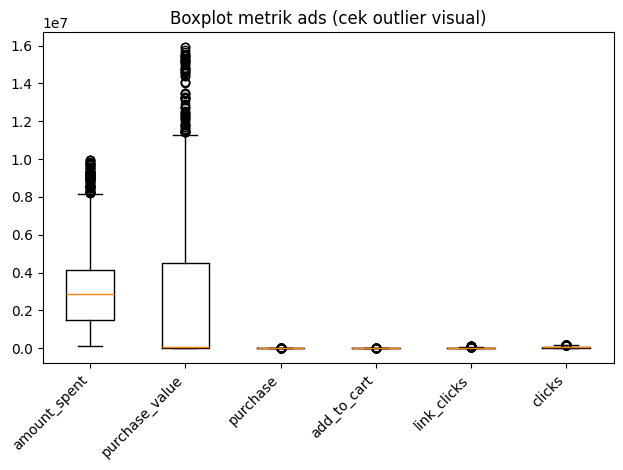

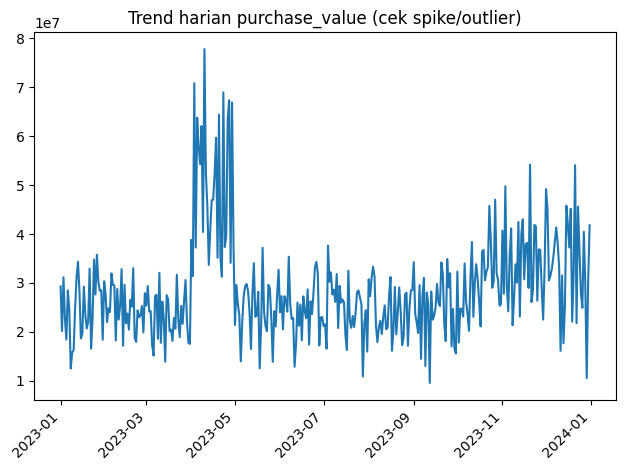

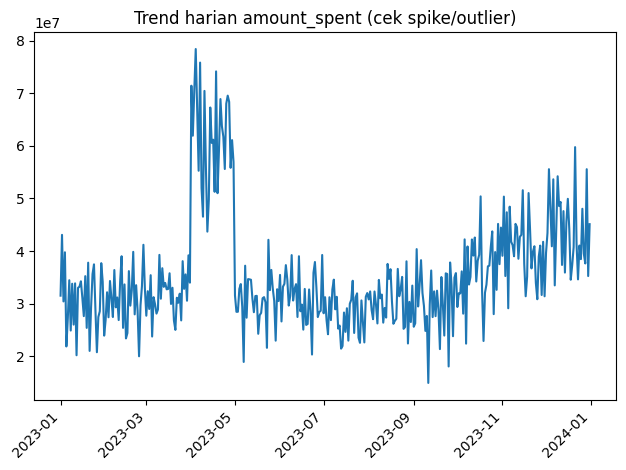

In [19]:
# =========================
# 4) VISUALISASI CEPAT (opsional tapi sangat membantu)
# =========================
# (a) Boxplot per metrik (tanpa seaborn)
plt.figure()
plt.boxplot([df[c].dropna().values for c in outlier_cols], labels=outlier_cols, vert=True)
plt.xticks(rotation=45, ha="right")
plt.title("Boxplot metrik ads (cek outlier visual)")
plt.tight_layout()
plt.show()

# (b) Trend harian purchase_value & amount_spent
for col in ["purchase_value", "amount_spent"]:
    if col in daily.columns:
        plt.figure()
        plt.plot(daily["created_date"], daily[col])
        plt.title(f"Trend harian {col} (cek spike/outlier)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


In [20]:
# =========================
# 5) (PENTING) Jangan hapus outlier dulu
# =========================
# Rekomendasi: simpan list outlier untuk bahan insight/PPT
# Export opsional:
# df_iqr_out.to_csv("outliers_iqr.csv", index=False)
# df_rz_out.to_csv("outliers_robustz.csv", index=False)
# spike_days.to_csv("spike_days.csv", index=False)


## **Feature Engineering (KPI Creation)**

In [21]:
# ========================================
# HITUNG KPI (CTR, CPC, CVR)
# ========================================
df_kpi = df.copy()

# Perhitungan Rumus
df_kpi['CTR'] = (df_kpi['clicks'] / df_kpi['impressions']) * 100
df_kpi['CPC'] = df_kpi['amount_spent'] / df_kpi['clicks']
df_kpi['CVR'] = (df_kpi['purchase'] / df_kpi['clicks']) * 100

# Bersihkan nilai error (division by zero)
df_kpi.replace([np.inf, -np.inf], np.nan, inplace=True)


In [22]:
# ========================================
# ANALISIS A.1: CTR KESELURUHAN
# ========================================
print("\n" + "="*50)
print("ANALISIS A.1: CTR KESELURUHAN")
print("="*50)

total_impressions = df_kpi['impressions'].sum()
total_clicks = df_kpi['clicks'].sum()
overall_ctr = (total_clicks / total_impressions) * 100

print(f"📊 CTR Rata-rata: {overall_ctr:.4f}%")
if overall_ctr >= 1.5:
    print("💡 Status: Performa BAIK")
else:
    print("💡 Status: Perlu OPTIMASI")


ANALISIS A.1: CTR KESELURUHAN
📊 CTR Rata-rata: 9.9325%
💡 Status: Performa BAIK



ANALISIS A.2: BY OBJECTIVE
                     CTR    CPC   CVR
campaign_objective                   
Sales               9.88  45.89  0.93
Traffic             9.98  45.59  0.00


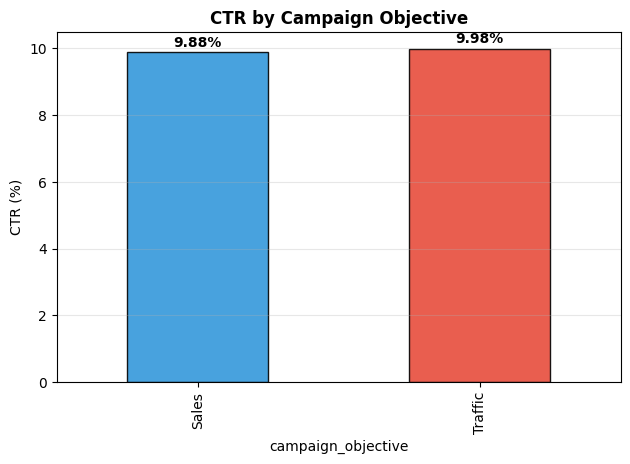

In [23]:
# ========================================
# ANALISIS A.2: BY CAMPAIGN OBJECTIVE
# ========================================
print("\n" + "="*50)
print("ANALISIS A.2: BY OBJECTIVE")
print("="*50)

ctr_by_objective = df_kpi.groupby('campaign_objective').agg({
    'impressions': 'sum', 'clicks': 'sum', 
    'amount_spent': 'sum', 'purchase': 'sum'
})

# Hitung ulang rasio untuk grup
ctr_by_objective['CTR'] = (ctr_by_objective['clicks'] / ctr_by_objective['impressions']) * 100
ctr_by_objective['CPC'] = ctr_by_objective['amount_spent'] / ctr_by_objective['clicks']
ctr_by_objective['CVR'] = (ctr_by_objective['purchase'] / ctr_by_objective['clicks']) * 100

print(ctr_by_objective[['CTR', 'CPC', 'CVR']].round(2))

fig = plt.figure(figsize=(16, 10))

# Plot 1: CTR by Objective
ax1 = plt.subplot(2, 2, 1)
ctr_by_objective['CTR'].plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'], alpha=0.9, edgecolor='black')
ax1.set_title('CTR by Campaign Objective', fontweight='bold', fontsize=12)
ax1.set_ylabel('CTR (%)')
ax1.grid(axis='y', alpha=0.3)

# Logika menambah label persen di atas batang
for p in ax1.patches:
    value = p.get_height()
    ax1.annotate(f'{value:.2f}%', 
                 (p.get_x() + p.get_width() / 2., value), 
                 ha='center', va='bottom', 
                 xytext=(0, 2), textcoords='offset points', 
                 fontweight='bold', fontsize=10)

In [24]:
# ========================================
# 6. ANALISIS C: INDUSTRY & ACCOUNT
# ========================================
print("\n" + "="*50)
print("ANALISIS C: INDUSTRY & ACCOUNT")
print("="*50)

# Performa Industri
industry_perf = df_kpi.groupby('industry').agg({
    'purchase_value': ['sum', 'mean'],
    'impressions': 'sum', 'clicks': 'sum', 'amount_spent': 'sum'
})
industry_perf.columns = ['total_omzet', 'avg_omzet', 'impressions', 'clicks', 'amount_spent']
industry_perf['ROAS'] = industry_perf['total_omzet'] / industry_perf['amount_spent']
industry_perf = industry_perf.sort_values('avg_omzet', ascending=False)

print("\nTop Industri (Avg Omzet):")
print(industry_perf[['avg_omzet', 'ROAS']].head(3))

# Performa Akun
account_perf = df_kpi.groupby('account_name')[['purchase_value', 'amount_spent']].sum()
account_perf = account_perf.sort_values('purchase_value', ascending=False)

print("\nTop 5 Akun (Revenue):")
print(account_perf.head())


ANALISIS C: INDUSTRY & ACCOUNT

Top Industri (Avg Omzet):
             avg_omzet      ROAS
industry                        
Beauty    2.398943e+06  0.812835
Fashion   2.389952e+06  0.801893
FMCG      2.368784e+06  0.805718

Top 5 Akun (Revenue):
                    purchase_value  amount_spent
account_name                                    
Client C - Fashion    1.779702e+09  2.127994e+09
Client D - Beauty     1.762483e+09  2.214683e+09
Client B - Beauty     1.739974e+09  2.094255e+09
Client E - FMCG       1.739546e+09  2.140263e+09
Client F - FMCG       1.718880e+09  2.152087e+09


## **Exploratory Data Analysis (EDA)**

## **Insights Summary**

## **Business Recommendation**